## Python statistics essential training - 05_02_fitmodel

Standard imports

In [6]:
import math

In [7]:
import numpy as np
import pandas as pd

In [8]:
import matplotlib
import matplotlib.pyplot as pp

In [11]:
%matplotlib inline

SyntaxError: invalid syntax (<ipython-input-11-1b1b8f8c171a>, line 2)

In [12]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [13]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Loading gapminder data for year 1985 (Live Aid!) and setting up plot as in chapter 3

In [14]:
gapminder = pd.read_csv('gapminder.csv')

In [44]:
gdata = gapminder.query('year == 1985')
gdata.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
50,Afghanistan,1985,Asia,11630498.0,45.21,78.400,7.68,1384.0,3.789185
131,Albania,1985,Europe,2966799.0,72.71,94.570,3.23,4267.0,11.682409
212,Algeria,1985,Africa,22565908.0,67.18,92.880,5.98,11030.0,30.198494
293,Angola,1985,Africa,9745209.0,47.50,77.170,7.21,4117.0,11.271732
374,Antigua and Barbuda,1985,America,65744.0,72.13,96.946,2.09,11383.0,31.164956


In [16]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                       c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

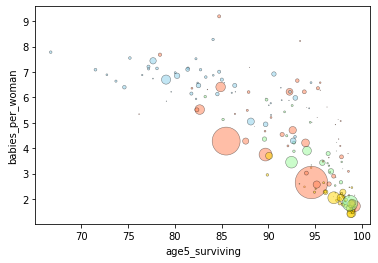

In [17]:
plotdata()

We are trying to predict the babies_per_woman using 1. In R-style formula the structure is dependent (what to predict) ~ independent (what to use to predict)

In [45]:
model = smf.ols(formula='babies_per_woman ~ 1', data=gdata)

In [46]:
grandmean = model.fit()

In [47]:
grandmean

In [48]:
def plotfit(fit):
    plotdata()
    pp.scatter(gdata.age5_surviving, fit.predict(gdata), c=colors, s=30,linewidths=0.5,edgecolor='k', marker='D')

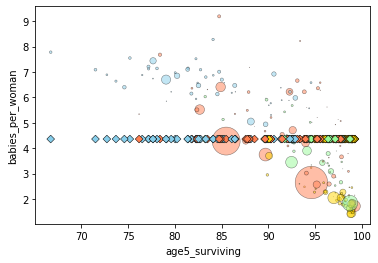

In [49]:
plotfit(grandmean)

In [50]:
grandmean.params

Intercept    4.360714
dtype: float64

In [28]:
gdata.babies_per_woman.mean()

4.360714285714287

In [33]:
groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region', data=gdata).fit()

In [34]:
groupmeans.params

region[Africa]     6.321321
region[America]    3.658182
region[Asia]       4.775577
region[Europe]     2.035682
dtype: float64

In [35]:
gdata.groupby('region').babies_per_woman.mean()

region
Africa     6.321321
America    3.658182
Asia       4.775577
Europe     2.035682
Name: babies_per_woman, dtype: float64

In [36]:
surviving = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving', data=gdata).fit()

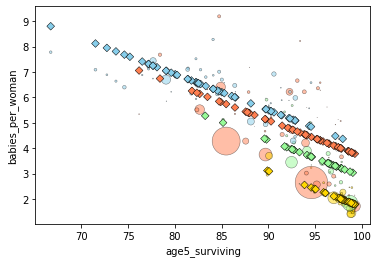

In [37]:
plotfit(surviving)

In [38]:
surviving.params

region[Africa]     18.265792
region[America]    17.085884
region[Asia]       17.864741
region[Europe]     15.872183
age5_surviving     -0.141886
dtype: float64

In [39]:
surviving_byregion = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region', data=gdata).fit()

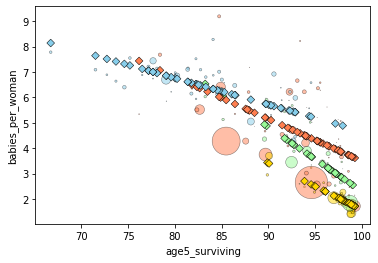

In [40]:
plotfit(surviving_byregion)

In [41]:
surviving_byregion.params

region[Africa]                    15.080914
region[America]                   27.506243
region[Asia]                      20.032483
region[Europe]                    19.884446
age5_surviving:region[Africa]     -0.104053
age5_surviving:region[America]    -0.251994
age5_surviving:region[Asia]       -0.165384
age5_surviving:region[Europe]     -0.183029
dtype: float64

In [42]:
surviving_byregion_population = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region + population', data=gdata).fit()

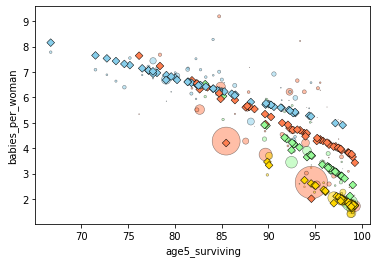

In [43]:
plotfit(surviving_byregion_population)

In [51]:
surviving_byregion_population.params

region[Africa]                    1.513953e+01
region[America]                   2.721512e+01
region[Asia]                      2.060924e+01
region[Europe]                    1.997501e+01
age5_surviving:region[Africa]    -1.044609e-01
age5_surviving:region[America]   -2.484114e-01
age5_surviving:region[Asia]      -1.702392e-01
age5_surviving:region[Europe]    -1.835316e-01
population                       -2.367914e-09
dtype: float64